In [1]:
%matplotlib inline

# MNIST 실습

## DNN
- Step 1. MNIST 데이터셋 가져오기
- Step 2. Keras로 DNN 구성하기
- Step 3. Train 데이터로 학습하기
- Step 4. Test 데이터로 성능평가

MNIST 데이터셋은 얀 르쿤 교수님의 홈페이지에서 받을 수 있습니다.   
http://yann.lecun.com/exdb/mnist/

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_1.png" >

이 MNIST 데이터셋을 사용한 분류기(Classifier)들의 성능도 게시되어 있습니다.   
DNN으로는 `0.35`까지, CNN으로는 `0.23`까지 오류를 줄일 수 있었네요

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_2.png" >

MNIST 데이터셋은 총 6만 개의 학습(Train) 셋과 1만 개의 테스트(Test) 셋으로 구성되어 있습니다.

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_3.png" >

데이터셋의 내부에는 아래와 같은 포맷으로 작성되어 있습니다.

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_4.png" >

하지만 우리는 Keras의 데이터셋 함수를 이용해서 더 쉽게 이용해 보겠습니다! ^^

## 파이썬 라이브러리 불러오기

사용할 라이브러리들을 불러옵니다.

In [2]:
import numpy as np                   # 수치 연산 라이브러리
import matplotlib.pyplot as plt      # 그림 그리는 라이브러리
import random                        # 무작위 숫자 생성을 위해 임포트

from keras.datasets import mnist     # MNIST 데이터셋을 불러오기 위한 보조 함수
from keras.models import Sequential  # Keras의 시퀀셜 모델

from keras.layers import Dense, Dropout, Activation # 모델에서 사용할 레이어 형태
from tensorflow.python.keras.utils import np_utils # 넘파이 관련한 도구들

## 데이터셋 불러오기

Keras의 datasets를 이용해 MNIST 데이터셋을 불러오겠습니다.

In [3]:
# MNIST 데이터는 60,000개(28x28 pixel)의 학습 이미지와 10,000개(28x28pixel)의 테스트 이미지로 구성되어 있습니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train 데이터
print("X_train shape", X_train.shape)  # 이미지 데이터
print("y_train shape", y_train.shape)  # 레이블 데이터
# Test 데이터
print("X_test shape", X_test.shape)  # 이미지 데이터
print("y_test shape", y_test.shape)  # 레이블 데이터

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


불러온 데이터를 그림으로 한 번 그려보겠습니다.   
데이터가 많으니 무작위로 몇 개를 골라서 그려보겠습니다.   
셀을 다시 실행하면 또 다른 무작위 그림이 출력됩니다.

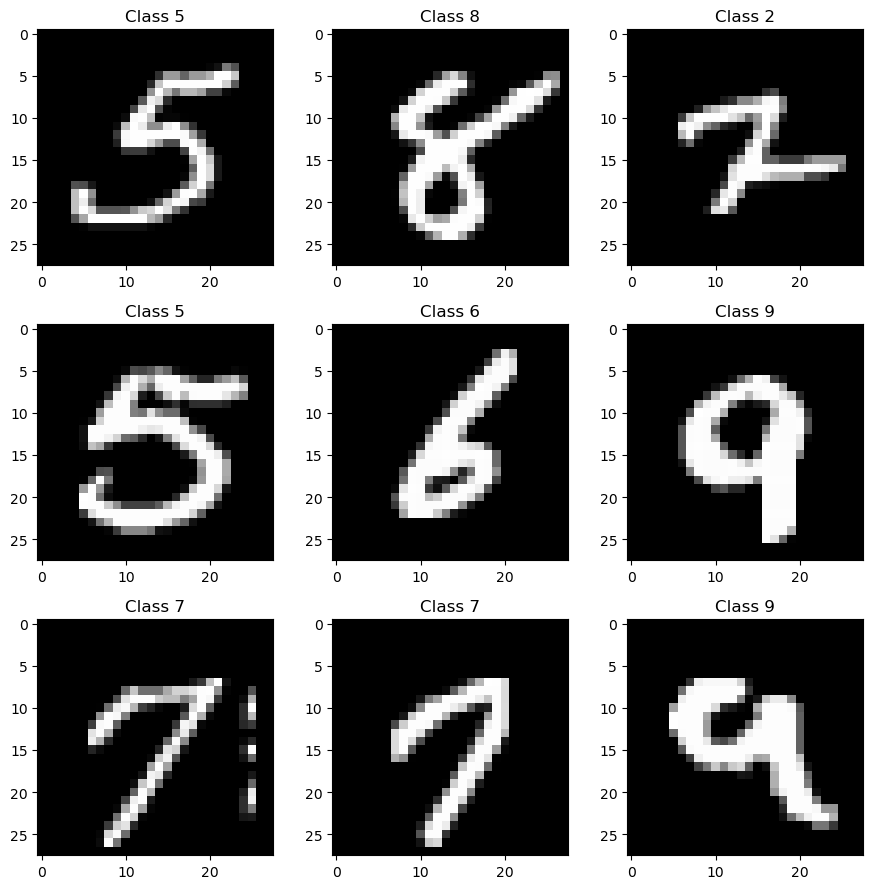

In [4]:
plt.rcParams['figure.figsize'] = (9,9)  # 그림의 사이즈를 정합니다

for i in range(9):
    plt.subplot(3,3,i+1)  # 그림이 그려질 위치를 정합니다
    num = random.randint(0, len(X_train))  # 그림을 그릴 대상 데이터셋을 무작위로 정합니다
    plt.imshow(X_train[num], cmap='gray', interpolation='none')  # 이미지를 그립니다
    plt.title("Class {}".format(y_train[num]))  # 이미지에 제목을 글자로 표시합니다

plt.tight_layout()  # 간격을 좁혀서 그림을 그립니다

이미지 말고 배열로도 그려보겠습니다

In [5]:
# 행렬을 출력할 함수를 만듭니다
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [6]:
num = 1000  # 그림을 그릴 데이터셋 번호를 지정합니다
matprint(X_train[num])  # 행렬을 출력 합니다
print("==========\n정답 :", y_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0   36  146  254  255  251   95    6   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    3   97  234  254  254  232  254  254   35   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0   89  140  254  254  174   67   33  200  254  190   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0  108  253  254  235   51    1    0    0   12  254  253  56  0  0  0  0  0  0  
0

각 픽셀은 8bit 정수이며, 0부터 255 사이의 값을 갖습니다.   
이미지에서 숫자 `0`은 검정, 숫자 `255`는 하양을 표현합니다.

이것을 싱글-채널 픽셀이라고 부르며, 단색(monochrome)이라고 합니다.

## 입력층의 형태로 데이터 전처리

이미지는 28x28 행렬의 형태로 데이터가 존재하지만, DNN의 입력층은 한 줄로 죽 늘어선 벡터 형태여야 합니다. 그래서 우리는 28x28을 784 길이를 가진 벡터로 바꿔보겠습니다(reshape or flatten).

그리고 [0-255]의 값을 [0-1]로 정규화(nomalize)하겠습니다.

<img src='https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/flatten.png' >

In [7]:
X_train = X_train.reshape(60000, 784) # 60,000개(28x28) 행렬을 60,000개의 784 길이의 벡터로 변환
X_test = X_test.reshape(10000, 784)   # 10,000개(28x28) 행렬을 10,000개의 784 길이의 벡터로 변환

X_train = X_train.astype('float32')   # 손쉬운 정규화를 위해서 integer 형태를 float32로 변환
X_test = X_test.astype('float32')

X_train /= 255                        # 각 픽셀의 값을 255로 나누어 [0-1] 값으로 정규화
X_test /= 255

print("학습 행렬 모양 :", X_train.shape)
print("테스트 행렬 모양", X_test.shape)

학습 행렬 모양 : (60000, 784)
테스트 행렬 모양 (10000, 784)


이미지 뿐만 아니라 레이블 값도 아래와 같이 벡터의 형태로 바꾸어야 합니다.   
레이블 벡터는 총 10개의 공간을 갖고 있고, 앞에서부터 `0~9`를 표현한다고 가정합니다.   
만약 숫자 `0`이라면, `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`으로 숫자 `0`을 표현합니다.


```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
...
```

이러한 정답 데이터로 학습을 했을 때, 모델로부터 도출된 결과값은 1에 가까운 숫자의 위치일수록 그 숫자를 표현한다고 말할 수 있습니다.   
예를 들어 다음의 결과값은  숫자 1일 확률이 크다고 표현할 수 있습니다.

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```

이런 라벨링은 np_utils를 통해 손쉽게 만들 수 있습니다.   
to_categorical 함수를 이용하면 바로 정답 데이터를 만들 수 있습니다.

In [8]:
nb_classes = 10  # 숫자의 총 개수

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
y_train[0]

5

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 3층 Fully Connected Network

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/figure.png" />

In [11]:
# Keras의 시퀀셜 모델을 사용합니다.

model = Sequential()

Metal device set to: Apple M1 Pro


2023-10-13 11:16:33.298980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 11:16:33.299331: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 첫 번째 은닉 층

In [12]:
# 첫 번째 은닉 층은 512개의 노드를 갖도록 해보겠습니다.
# 각 노드는 각 입력 벡터와 가중치 그리고 편향을 받습니다.

model.add(Dense(512, input_shape=(784,))) #(784,)에서 ,는 오타가 아니라 784 길이 벡터를 표현합니다

In [13]:
# 활성화 함수는 relu를 써보겠습니다.
# 얼마든지 다른 활성화 함수로도 변경해 보세요!
# 활성화 함수의 종류 : https://keras.io/api/layers/activations/

model.add(Activation('relu'))

$$f(x) = max (0,x)$$
<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/relu.jpg' >

In [14]:
# 성능을 높이기 위해 드랍아웃을 추가하겠습니다.
# 드랍아웃은 학습 데이터의 오버피팅을 막는데 도움을 줍니다.
model.add(Dropout(0.2))

## 두 번째 은닉 층

In [15]:
# 두 번째 은닉 층도 52개의 노드를 갖도록 설정해 보겠습니다.
# 활성화 함수와 드랍아웃은 첫 번째 은닉 층과 동일하게 설정하겠습니다.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

In [16]:
# 출력 층은 정답 데이터의 길이와 같게 설정합니다.
# 출력 층의 벡터는 숫자 10개를 표현하므로 뉴런의 개수도 10개로 설정합니다.
model.add(Dense(10))

In [17]:
# 출력 층의 합이 1이 될 수 있도록 소프트맥스 활성화 함수를 사용합니다.
# 이것은 확률 분포로 해석될 수 있습니다.

model.add(Activation('softmax'))

이제 구성한 모델을 확인해 봅니다!

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

파라미터의 개수가 67만개나 되네요!

## 모델 컴파일

Keras는 TensorFlow를 베이스로 구축된 라이브러리입니다. Python에서 계산 그래프(Computational Graph)를 정의한 다음, Python 인터프리터의 오버 헤드없이 CPU 또는 GPU에서 효율적으로 실행되는 특징이 있습니다.

모델을 비교할 때 Keras는 **손실 함수**(loss function)와 **최적화 함수**(optimizer)를 지정하도록 요청합니다. 여기서 사용할 손실 함수는 *Categorical Cross-entropy*라고 하며 두 확률 분포를 비교하는 데 적합한 손실 함수입니다.

모델의 예측 값은 10개의 숫자에 대한 확률 분포입니다. 정답인 카테고리는 1, 나머지는 0입니다. 교차 엔트로피는 예측 분포가 정답 분포와 얼마나 다른지 측정합니다. [자세한 내용은 Wikipedia 참조](https://en.wikipedia.org/wiki/Cross_entropy)

옵티마이저는 **경사 하강법**(Gradient descent)을 통해 모델이 학습하는 속도를 결정하는 데 도움이 됩니다. 기울기가 하강하는 속도를 **학습률**(learning rate)라고 합니다.

<img src = "https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/gradient_descent.png" >

<img src = "https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/learning_rate.png" >

그렇다고 작은 학습률이 좋지는 않습니다. 자칫하면 지역 최소값에서 벗어날 수 없게 됩니다. 따라서 더 큰 학습률을 시도하는 것이 필요할 수 있습니다.

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/complicated_loss_function.png' >

In [19]:
# Adam Optimizer를 사용해서 컴파일 하겠습니다
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 모델 학습
이제 모델 학습을 시작합니다!

모델 학습을 시작할 때 배치 사이즈, 에폭 등을 정해야 합니다.

배치 크기(batch_size)는 손실 함수, 기울기 및 역전파를 계산하는 데 사용되는 단계 당 데이터 양을 결정합니다. 배치 크기가 크면 네트워크가 더 빠르게 훈련을 완료할 수 있습니다. 그러나 훈련 속도 외에 고려해야 할 다른 요소가 있습니다.

배치 크기가 너무 크면 손실 함수의 지역 최소값(local minima)이 평활화(smoothing)되어 옵티마이저가 전역 최소값(global minimum)을 찾았다고 생각하기 때문에 거기에 정착하게 됩니다.

하지만 배치 크기가 너무 작으면 잡음이 많은 손실 함수가 생성되고 옵티마이저가 전역 최소값을 찾지 못할 수 있습니다.

따라서 좋은 배치 크기를 찾으려면 많은 시행 착오가 필요합니다!

In [20]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5


2023-10-13 11:16:33.925889: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-13 11:16:34.197179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 24s 46ms/step - loss: 0.2450 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 20s 43ms/step - loss: 0.1016 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 19s 42ms/step - loss: 0.0716 - accuracy: 0.9775
Epoch 4/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0543 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 20s 44ms/step - loss: 0.0441 - accuracy: 0.9859


결과의 두 숫자는 순서대로 훈련 데이터셋에 대한 네트워크의 손실 함수 값(loss)과 훈련 데이터셋에 대한 네트워크의 전체 정확도(accuracy)를 나타냅니다. 그럼 학습하지 않은 데이터에 대해 어떻게 평가할까요?

## 테스트 데이터로 모델의 정확도 평가하기

model의 evaluate 함수를 사용합니다. 이 함수에 테스트 데이터셋을 넣어보죠!

In [21]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2023-10-13 11:18:17.404980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 13s 40ms/step - loss: 0.0618 - accuracy: 0.9807
Test score: 0.06183640658855438
Test accuracy: 0.9807000160217285


테스트 정확도가 `98%`가 나왔네요!! 물론 제일 위에서 살펴본 최고 정확도 모델에 가까워지려면 한참 먼 것 같습니다.

### 결과 살펴보기

모델 학습에서 evaluate의 결과값만 보고 끝내지 말고, 항상 출력을 검사하고 모든 것이 정상인지 확인하는 것이 좋습니다.   
아래에서 정답인 예와 오답인 예를 살펴보겠습니다.

In [22]:
# predict_classes 함수는 가장 높은 확률 클래스를 출력합니다
predicted_classes = model.predict_classes(X_test)

# 맞은 경우와 틀린 경우를 구분하여 인덱스(위치)를 저장하겠습니다
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

- 정답인 경우

5는 애매한데 5라고 잘 구분을 했네요 ㅋㅋ

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

- 오답인 경우

정말 애매한 것들이네요 ^^;   
이 예만 봐서는 모델링이 잘 되었다고 생각할 수 있을 것 같습니다.

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

## 더 많은 시행착오를 겪으세요!
배치사이즈 등을 바꾸어서 더 많은 실험을 해보세요!
- 배치 사이즈를 조절했을 때 걸리는 학습 시간과 테스트 정확도에 얼마나 영향을 미칠까요?
- 배치 사이즈가 32이면 어떤가요?

### 참고 자료
- https://github.com/wxs/keras-mnist-tutorial
- https://github.com/yashk2810/MNIST-Keras
- https://github.com/AviatorMoser/keras-mnist-tutorial